1
[0, 0]
-------------- 0.75
IN: chassis speed x 0.75 y 0 z 0;
OUT: ok;
2
[0, 0]
-------------- 0.75
IN: chassis speed x 0.75 y 0 z 0;
OUT: ok;
3
[0, 0]
-------------- 0.75
IN: chassis speed x 0.75 y 0 z 0;
OUT: ok;
4
[0, 0]
-------------- 0.75
IN: chassis speed x 0.75 y 0 z 0;
OUT: ok;
5
[0, 0]
-------------- 0.75
IN: chassis speed x 0.75 y 0 z 0;
OUT: ok;
6
[0, 0]
-------------- 0.75
IN: chassis speed x 0.75 y 0 z 0;
OUT: ok;
7
[0, 0]
-------------- 0.75
IN: chassis speed x 0.75 y 0 z 0;
OUT: ok;
8
[0.001, 0]
-------------- 0.7484999999999999
IN: chassis speed x 0.7484999999999999 y 0 z 0;
OUT: ok;
9
[0.002, 0]
-------------- 0.747
IN: chassis speed x 0.747 y 0 z 0;
OUT: ok;
10
[0.009, 0]
-------------- 0.7364999999999999
IN: chassis speed x 0.7364999999999999 y 0 z 0;
OUT: ok;
11
[0.023, 0]
-------------- 0.7155
IN: chassis speed x 0.7155 y 0 z 0;
OUT: ok;
12
[0.046, 0]
-------------- 0.681
IN: chassis speed x 0.681 y 0 z 0;
OUT: ok;
13
[0.062, -0.001]
-------------- 0.657
IN: chass

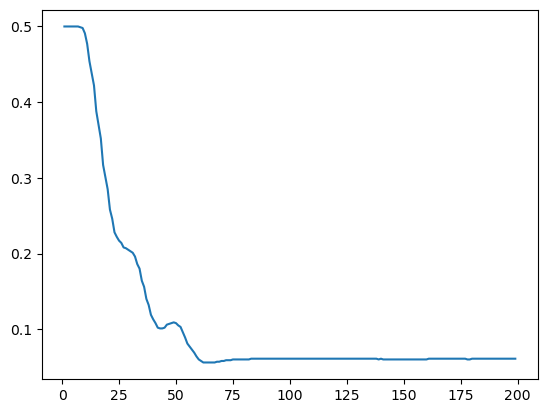

In [5]:
import SDK_
import Message_Delivery
import MSG_Solve
import Chassis_Solve
import Chassis_Move
import matplotlib.pyplot as plt


kp = 1.5
target = 0.5
error_list = []

SDK_.connect_enter_SDK(printing=False)
Message_Delivery.connect_UDP(printing=False)
SDK_.IN_OUT("game_msg on;",printing=False)
SDK_.IN_OUT("chassis push position on pfreq 50;",printing=False)
SDK_.IN_OUT("robot mode free;",printing=False)
for i in range(1,200):
    print(i)
    msg = Message_Delivery.try_get(timeout = 1,printing=False)
    chassis_position = []
    chassis_position = MSG_Solve.solve_chassis_position(msg,printing=False)
    print(chassis_position)
    #chassis speed x 0.1 y 0.1 z 1;
    if chassis_position != []:
        error = target - chassis_position[0]
        error_list.append(error)
        x_speed = kp * error
        print("--------------",x_speed)
        SDK_.IN_OUT("chassis speed x " + str(x_speed) + " y 0 z 0;",printing=True)
print(error_list)
plt.plot(range(1,200),error_list)
plt.show()